---
# Multiclasificación de los insectos

---
#### **Los objetivos de este notebook son:**
✅ Task 1 → Realizar un análisis exploratorio de los datos.

✅ Task 2 → Realizar un modelo predictivo que permita conocer el tipo de insecto en función de variables predictoras.

<h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>Tabla de contenidos</center></h1>

<ul class="list-group" style="list-style-type:none;">
    <li><a href="#1" class="list-group-item list-group-item-action">1. Introducción</a></li>
    <li><a href="#2" class="list-group-item list-group-item-action">2. Preparación de los datos</a>
        <ul class="list-group" style="list-style-type:none;">
            <li><a href="#2.1" class="list-group-item list-group-item-action">2.1 Características de los datos</a></li>
            <li><a href="#2.2" class="list-group-item list-group-item-action">2.2 Importar librerías</a></li>
            <li><a href="#2.3" class="list-group-item list-group-item-action">2.3 Leer los datos</a></li>
            <li><a href="#2.4" class="list-group-item list-group-item-action">2.4 Procesamiento de los datos</a>
                <ul class="list-group" style="list-style-type:none;">
                    <li><a href="#2.4.1" class="list-group-item list-group-item-action">2.4.1 Tipología</a></li>
                    <li><a href="#2.4.2" class="list-group-item list-group-item-action">2.4.2 Datos duplicados</a></li>
                    <li><a href="#2.4.3" class="list-group-item list-group-item-action">2.4.3 Visualización de los datos</a></li>
                    <li><a href="#2.4.4" class="list-group-item list-group-item-action">2.4.4 Descripción estadística de los datos</a></li>
                    <li><a href="#2.4.5" class="list-group-item list-group-item-action">2.4.5 Ingeniería de características</a></li>
                    <li><a href="#2.4.6" class="list-group-item list-group-item-action">2.4.6 Tratamiento de los datos outliers</a></li>
                </ul>
            </li>
            <li><a href="#2.5" class="list-group-item list-group-item-action">2.5 EDA</a>
                <ul class="list-group" style="list-style-type:none;">
                    <li><a href="#2.5.1" class="list-group-item list-group-item-action">2.5.1 Correlación de las variables</a></li>
                    <li><a href="#2.5.2" class="list-group-item list-group-item-action">2.5.2 Análisis del target</a></li>
                </ul>
            </li>
        </ul>
    </li>
    <li><a href="#3" class="list-group-item list-group-item-action">3. Algoritmo</a>
        <ul class="list-group" style="list-style-type:none;">
            <li><a href="#3.1" class="list-group-item list-group-item-action">3.1 Feature Selection</a></li>
            <li><a href="#3.2" class="list-group-item list-group-item-action">3.2 Gated Residual</a>
                <ul class="list-group" style="list-style-type:none;">
                    <li><a href="#3.2.1" class="list-group-item list-group-item-action">3.2.1 Modelo</a></li>
                    <li><a href="#3.2.2" class="list-group-item list-group-item-action">3.2.2 Evaluación y resultados</a></li>
                    <li><a href="#3.2.3" class="list-group-item list-group-item-action">3.2.3 Predicción del nuevo dataset</a></li>
                </ul>
            </li>
        </ul>
    </li>
    <li><a href="#4" class="list-group-item list-group-item-action">4. Conclusiones</a></li>
    <li><a href="#5" class="list-group-item list-group-item-action">5. Referencias</a></li>
</ul>


<a id ="1"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>1. Introducción</center></h1>

Los insectos nocturnos representan uno de los grupos más diversos de organismos, por lo que es de suma importancia estudiarlos.

Es por ello que un grupo de prestigiosos entomólogos han construido un ecosistema aislado con múltiples especies para poder estudiarlos en mayor detalle. Para este estudio están diseñando un sistema de sensores para poder trackear de forma automática las dinámicas y hábitos de estos insectos.

Los tres insectos que nos interesan son: el Lepidoptero, la Himenoptera y la Diptera. 

* Los __Lepidópteros__ (Lepidoptera, del griego «lepis», escama, y «pteron», ala) constituyen un orden de Insectos neopteros, endopterigotos, que incluyen, además de las mariposas diurnas, las nocturnas con las polillas, esfinges y pavones [1].

* Los __Himenópteros__ constituyen un orden de Insectos neópteros, endopterigotos, que incluye grupos tan conocidos como las hormigas, las avispas y las abejas. El nombre proviene de sus alas membranosas (del griego υμεν hymen, "membrana" y πτερος pteros, "ala"). Aunque los Himenópteros presentan una gran variedad en cuanto a formas y tamaños, su plan morfológico estructural resulta muy homogéneo, lo que contrasta con la enorme variación en sus modelos de comportamiento [2].

* Los __Dípteros__ constituyen  un orden de Insectos neopteros, endopterigotos que incluye grupos tan conocidos como las moscas y mosquitos, además de  muchos otros. Caracterizados porque sus alas posteriores han quedado reducidas  a  unos órganos llamados halterios o balancines, que no se utilizan para volar, sino para mantener la estabilidad y la dirección durante el vuelo, como indica su nombre científico (Diptera, gr. "dos alas") poseen sólo dos alas membranosas y no cuatro como la gran mayoría de los Insectos [3].

El objetivo de este estudio es que a partir de las las dinámicas y hábitos de estos insectos captados por los sensores poder saber de qué insecto se trata sin verlo directamente. Esto es muy interesante para futuras investigaciones sobre sobrepoblación de alguno de estos insectos en la zona, cambios de hábitos y si aumentamos a más categórias de insectos incluyendo, por ejemplo, la Anisoptera podríamos aumentar el engrose de este estudio. 

<a id ="2"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>2. Preparación de los datos</center></h1>

La organización de este estudio nos ha proporcionado dos datasets. Estos tienen las mismas características pero uno no tiene el target debido a que se tratarán como datos nuevos que una vez hemos creado el algoritmo para clasificar estos insectos, los nuevos datos nos dirán, según sus características, de qué insecto estamos hablando.

<a id ="2.1"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>2.1 Características de los datos</center></h2> 


- **train.csv** - Consta de 7001 entradas y 9 características.
    * `Hour` : Hora a la que se ha hecho la medición.
    * `Minutes`: Minutos en los que se ha realizado la medición.
    * `Sensor_alpha`: Posición del insecto al sensor alpha.
    * `Sensor_beta`: Posición del insecto al sensor beta.
    * `Sensor_gamma`: Posición del insecto al sensor gamma.
    * `Sensor_alpha_plus`: Posición del insecto al sensor alpha+.
    * `Sensor_beta_plus`: Posición del insecto al sensor beta+.
    * `Sensor_gamma_plus`: Posición del insecto al sensor gamma+.
    * `Insect`: Categoría de insecto.
        - 0 -> Lepidoptero
        - 1 -> Himenoptera
        - 2 -> Diptera
    
- **test.csv** - Consta de 3000 entradas y 8 características.

<a id ="2.2"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>2.2 Importar librerías</center></h2> 

A continuación vamos a importar todas las librerías necesarias para la realización del todo el algoritmo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import os
import gc

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

from scipy.stats import zscore
from scipy.stats import iqr

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

2022-05-18 16:24:39.928736: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-18 16:24:39.928772: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<a id ="2.3"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>2.3 Leer los datos</center></h2> 

A continuación vamor a leeer los dos conjuntos de datos. Veremos las características que conforman los dos conjuntos. Como hemos mencionado anteriormente la primera columna `Unnamed: 0` se deberá eliminar ya que es una columna que no conforma característica propia de los datos. En el conjunto de `df_train` tiene finalmente 9 columnas, 8 características y 1 variable objetivo (Insect). En el conjunto `df_test` tiene 8 columnas y sin variable objetivo.  

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_x.csv')

In [3]:
df_train.head()

Unnamed: 0  Hour  Minutes  Sensor_alpha  Sensor_beta  Sensor_gamma  \
0           0    22       26    119.910995   242.838324   -316.819222   
1           1    10       16    -90.790536  -269.470767   -182.581844   
2           2    21       42    -20.028003  -147.070212     50.280872   
3           3    21       17    -21.258567     0.467070    -86.164153   
4           4    18       16    -58.154501   -13.051195   -156.501167   

   Sensor_alpha_plus  Sensor_beta_plus  Sensor_gamma_plus  Insect  
0         250.195048        -53.547777        -112.049983       2  
1          95.394941         37.291944          48.525180       0  
2         -90.750386        -50.476556          85.399009       1  
3         -21.813529       -209.256006          16.291882       0  
4          48.392938       -110.008860         -10.285138       2

In [4]:
print('Tamaño de los datos en bruto: ')
print('Train: \t',df_train.shape, '\nTest: \t',df_test.shape)

Tamaño de los datos en bruto: 
Train: 	 (7001, 10) 
Test: 	 (3000, 9)


<a id ="2.4"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>2.4 Preprocesamiento de los datos</center></h2> 

Como hemos mencionado la columna `Unnamed: 0` se elimará y mostraremos el tamaño definitivo de los datos preparados para empezar el preprocesamiento.

In [5]:
df_train = df_train.drop(['Unnamed: 0'],axis=1)
df_test = df_test.drop(['Unnamed: 0'],axis=1)

In [6]:
print('Tamaño de los datos en bruto: ')
print('Train: \t',df_train.shape, '\nTest: \t',df_test.shape)

Tamaño de los datos en bruto: 
Train: 	 (7001, 9) 
Test: 	 (3000, 8)


<a id ="2.4.1"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>2.4.1 Tipología del dato </center></h2>

En este apartado vamos a ver la información genérica del conjunto del dataset. 

**df_train:**

Podemos observar las siguientes características:

 - 6 características tipo `float` y 3 características tipo `int`. 
 - No hay presencia de valores faltantes.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hour               7001 non-null   int64  
 1   Minutes            7001 non-null   int64  
 2   Sensor_alpha       7001 non-null   float64
 3   Sensor_beta        7001 non-null   float64
 4   Sensor_gamma       7001 non-null   float64
 5   Sensor_alpha_plus  7001 non-null   float64
 6   Sensor_beta_plus   7001 non-null   float64
 7   Sensor_gamma_plus  7001 non-null   float64
 8   Insect             7001 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 492.4 KB


**df_test:**

Podemos observar las siguientes características:

 - 6 características tipo `float` y 2 características tipo `int`. 
 - No hay presencia de valores faltantes.

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hour               3000 non-null   int64  
 1   Minutes            3000 non-null   int64  
 2   Sensor_alpha       3000 non-null   float64
 3   Sensor_beta        3000 non-null   float64
 4   Sensor_gamma       3000 non-null   float64
 5   Sensor_alpha_plus  3000 non-null   float64
 6   Sensor_beta_plus   3000 non-null   float64
 7   Sensor_gamma_plus  3000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 187.6 KB


<a id ="2.4.2"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>2.4.2 Datos duplicados </center></h2>

En este apartado, vamos a averiguar si hay entradas de datos duplicados. Si hubiesen sería necesario eliminarlos debido a que pueden afectar tanto al análisis de los datos como al entrenamiento del modelo. 

En nuestro caso, no hay datos duplicados ni en el conjunto `df_train` ni en el conjunto `df_test`.

In [9]:
print('Número de datos duplicados: ')
print('Conjunto df_train:\t', df_train[df_train.duplicated()==True].shape[0])
print('Conjunto df_test:\t', df_test[df_test.duplicated()==True].shape[0])

Número de datos duplicados: 
Conjunto df_train:	 0
Conjunto df_test:	 0


<a id ="2.4.3"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>2.4.3 Visualización general de los datos</center></h2>

La visualización de los datos antes de realizar cualquier cualquier acción es muy importante para darnos una visión general sobre la distribución de estos. 

<a id ="2.4.3.1"></a><h3 style="background:#41fa9a; border:0; border-radius: 12px; color:black"><center>2.4.3.1 Train</center></h3>

Vamos a ver la distribución de densidades para el conjunto de entenamiento:

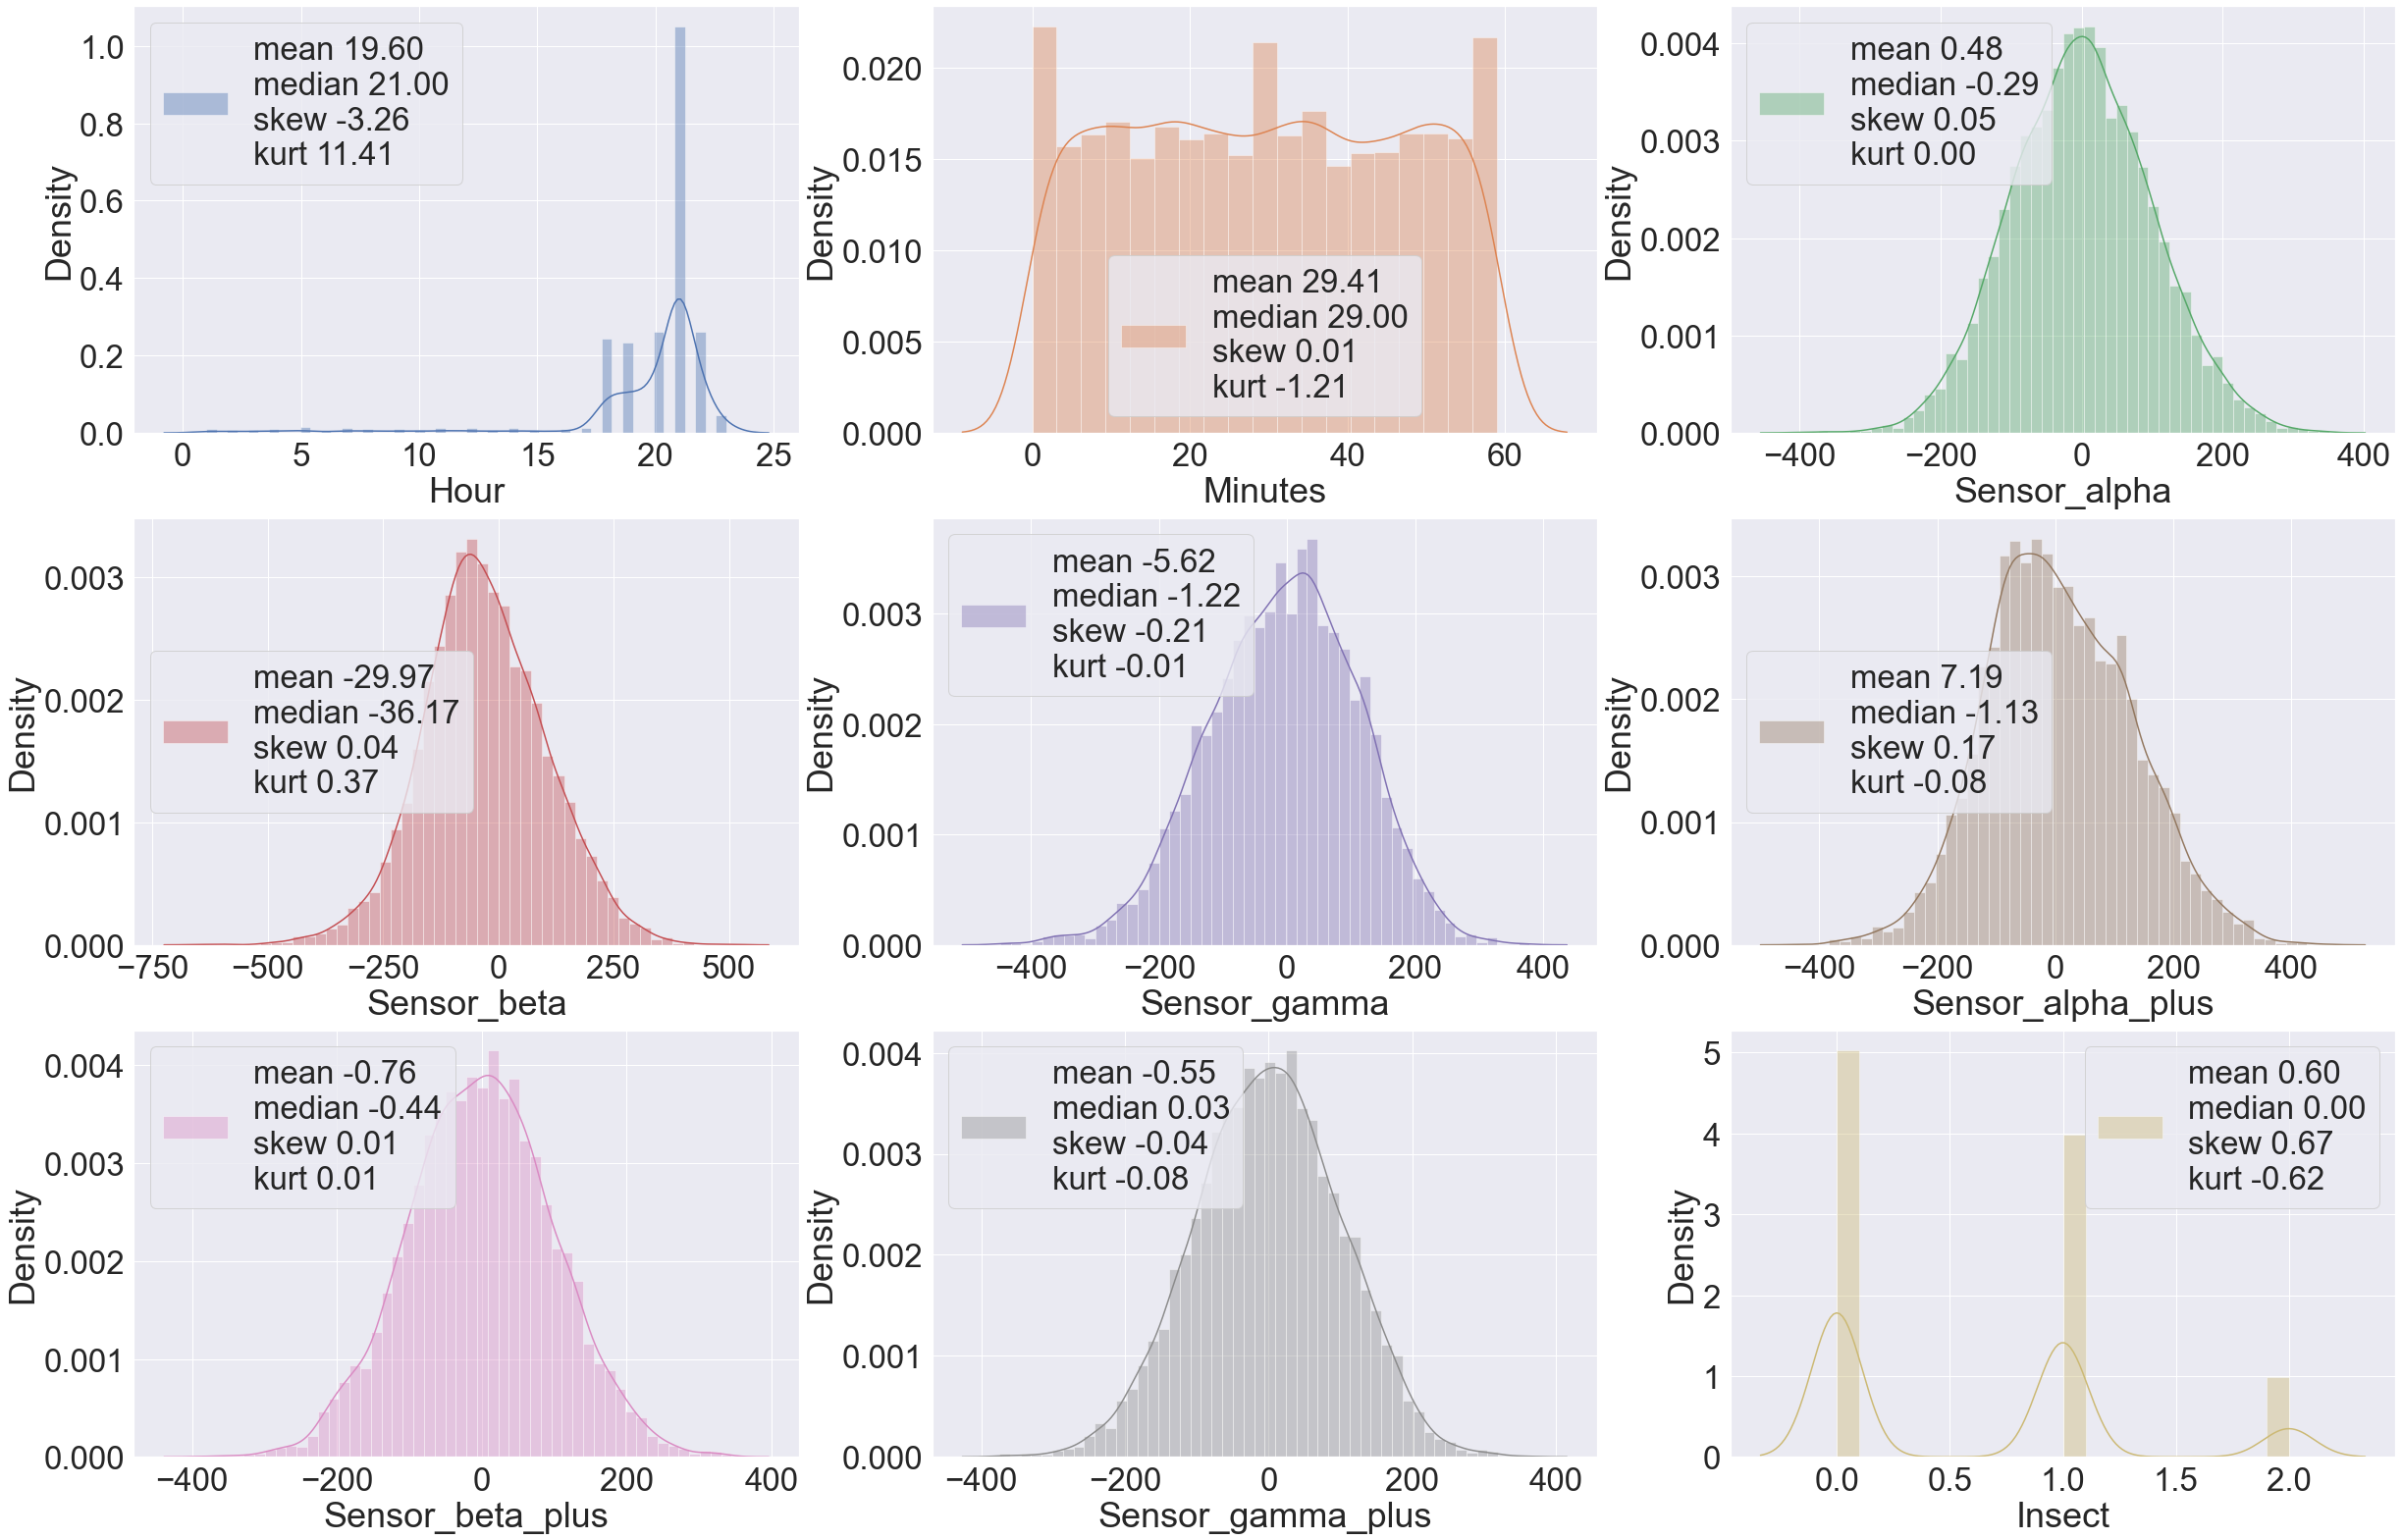

In [10]:
sns.set(font_scale=3)
cols = df_train.columns
n_row = len(cols)
n_col = 3
n_sub = 1
fig = plt.figure(figsize=(20,40))
for i in range(len(cols)):
    plt.subplots_adjust(left=-0.3, right=1.3, bottom=-0.3, top=1.3)
    plt.subplot(n_row, n_col, n_sub)
    sns.distplot(df_train[cols[i]],norm_hist=False,kde=True, 
                 color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                 label=['mean '+str('{:.2f}'.format(df_train.iloc[:,i].mean()))
                        +'\n''median '+str('{:.2f}'.format(df_train.iloc[:,i].median()))
                        +'\n''skew '+str('{:.2f}'.format(df_train.iloc[:,i].skew()))
                        +'\n''kurt '+str('{:.2f}'.format(df_train.iloc[:,i].kurtosis()))])                                                        
    n_sub+=1
    plt.legend()
plt.show()

En este gráfico hay algunos datos interesantes a destacar:
- `1`: Los datos de los sensores presentan una distribución que recuerda a la distribución Gaussiana con un skew muy pequeño y una simetría poco desviada (kurt)
- `2: Variable Hora` presenta asimetría en la distribución de densidad y un sesgo en los datos ya que la media y la mediana están lejos de coincidir. Esta variable la podríamos considerar categórica ya que tiene un número limitado de valores. Vemos que la mayoría de registros se realizan entre las 18:00 a las 22:00. Esto mostraría que son insectos con hábitos más nocturnos que diurnos (en términos generales).
- `3: Variable Minutes` presenta una distribución muy uniforme con 3 picos. Esto indicaría que hay más movimiento al inicio, final y a la mitat de las horas. Podría ser aleatorio estos picos o ser significativo. Deberíamos recoger más datos para poder ver cual de las dos opciones es la correcta. 
- `4: Variable Insect` presenta asimetría en la distribución de densidad y sesgo de los datos. Vemos que la categoría tipo 2 (__Dípteros__) no están muy representados. Esto podría causar problemas en las predicciones del algoritmo.

<a id ="2.4.3.2"></a><h3 style="background:#41fa9a; border:0; border-radius: 12px; color:black"><center>2.4.3.2 Test</center></h3>

Vamos a ver la distribución de densidades para el conjunto de test:

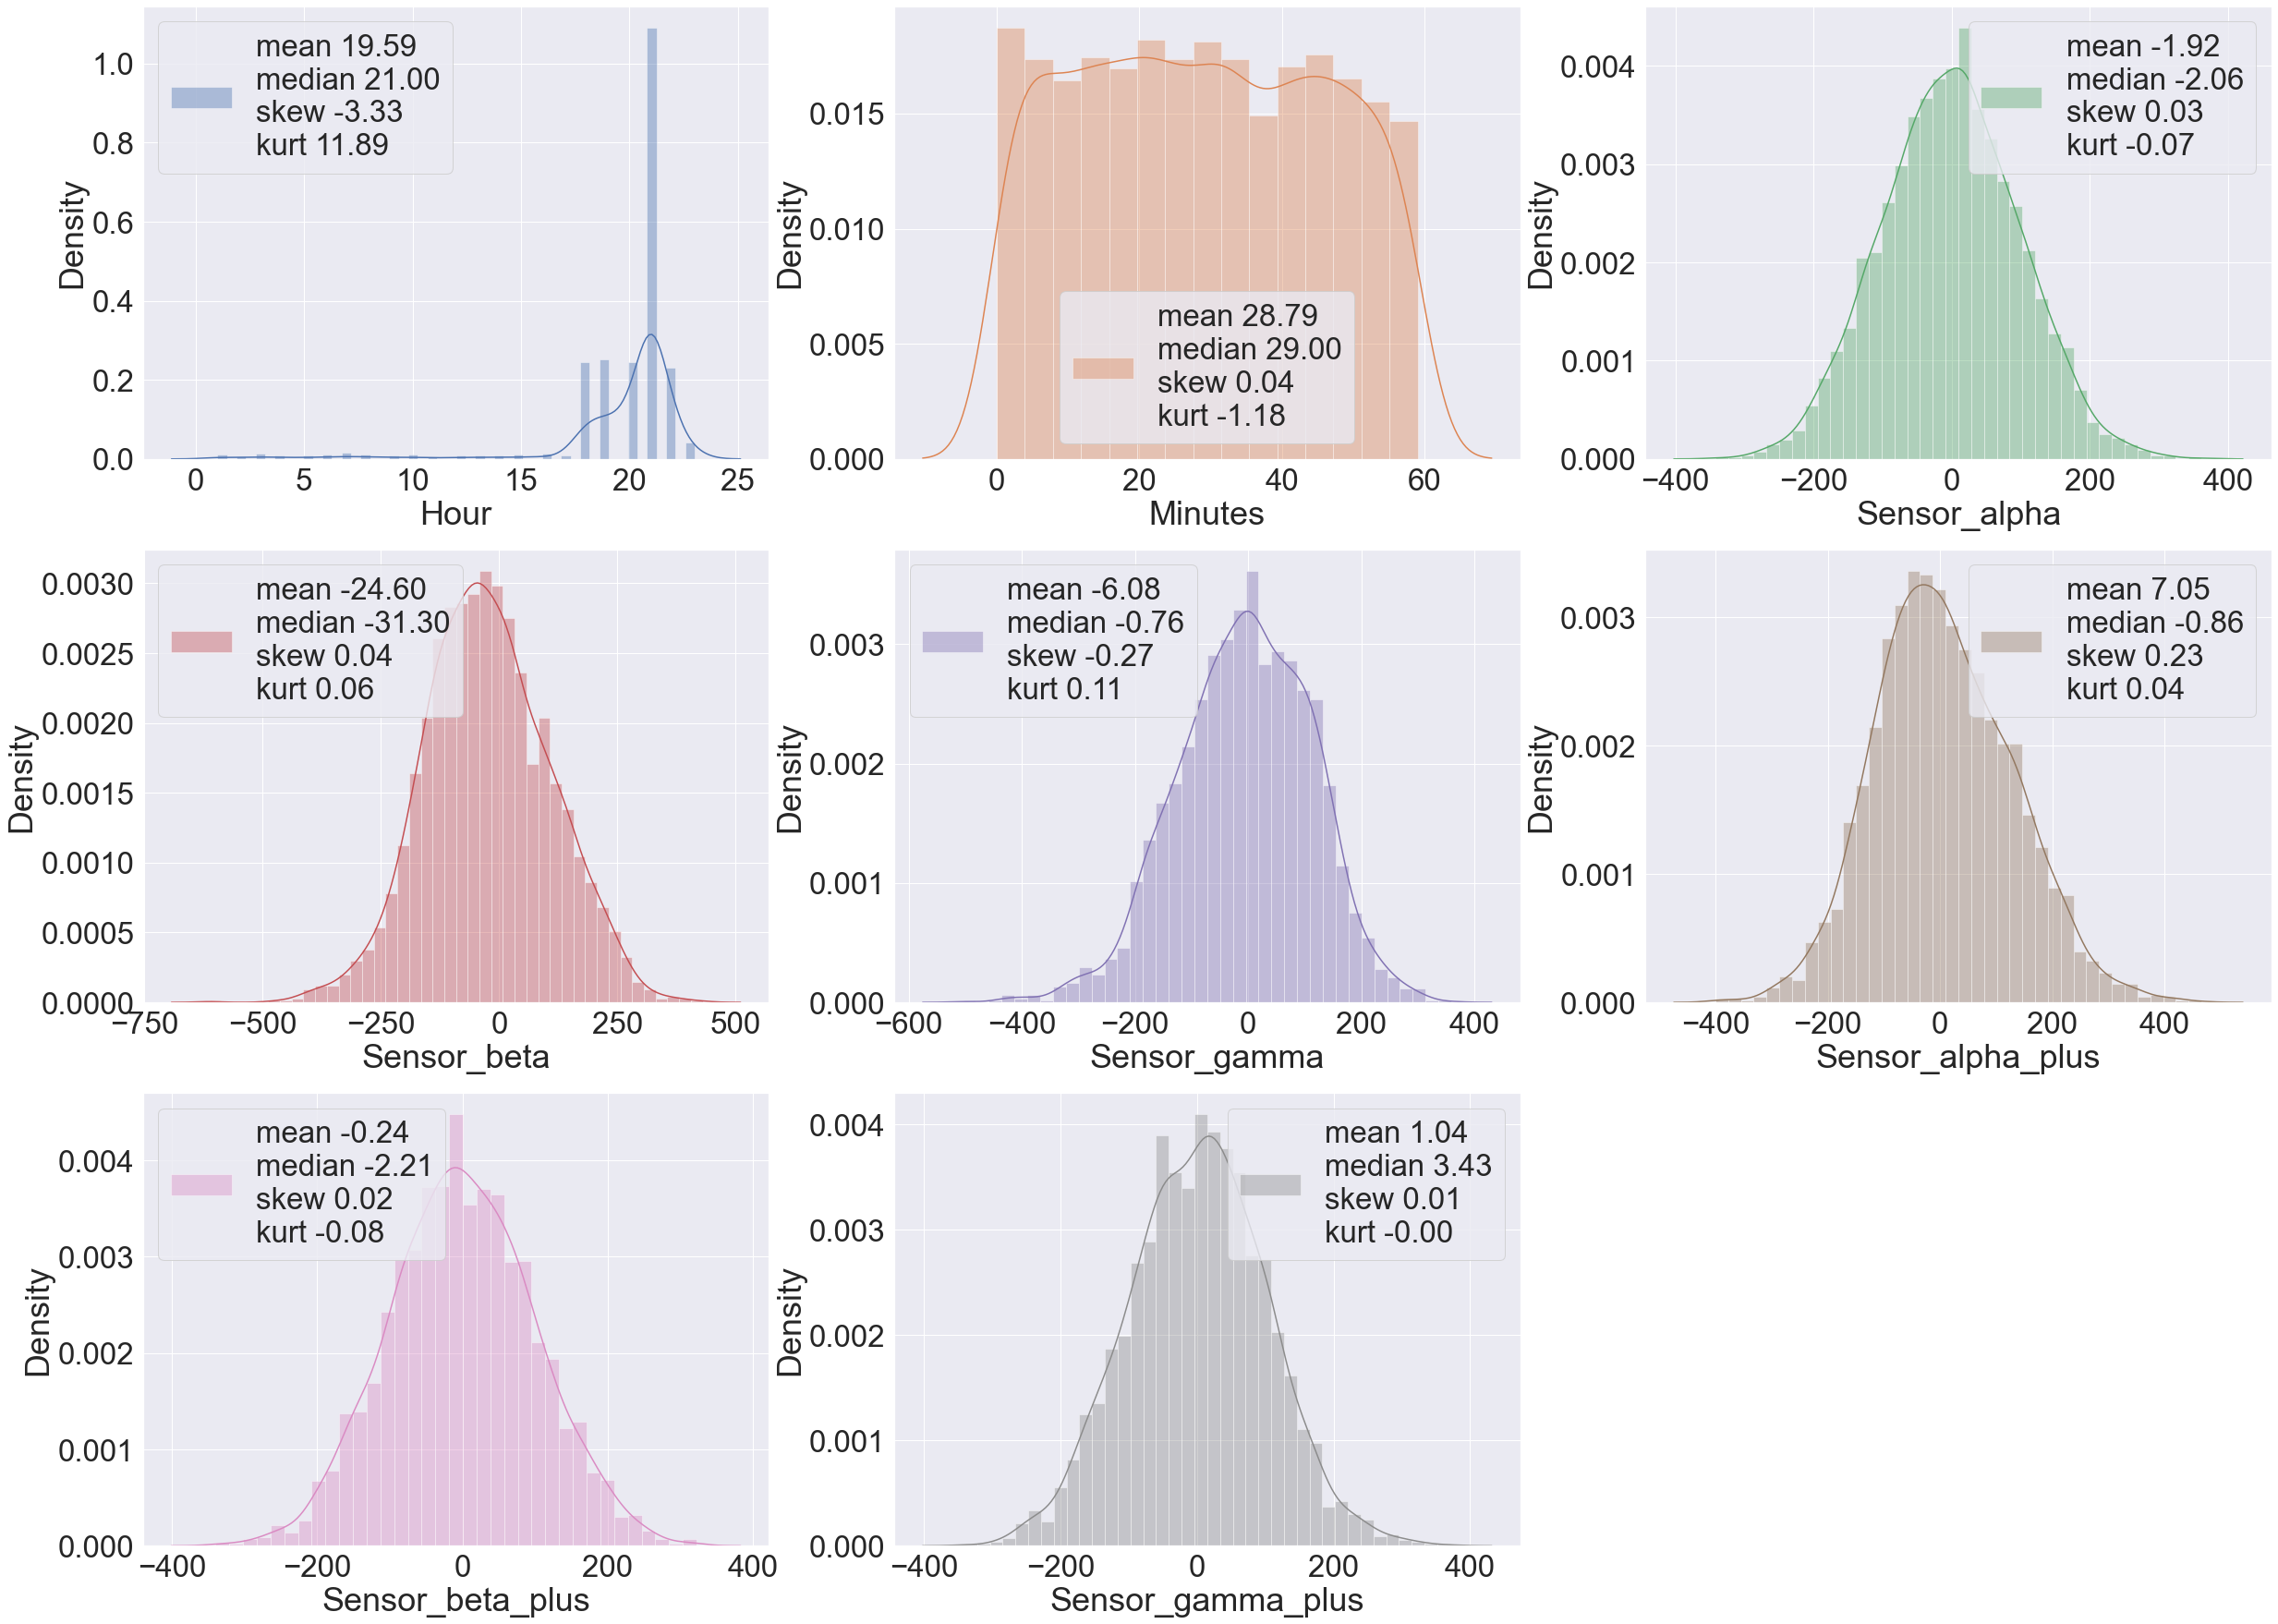

In [11]:
sns.set(font_scale=3)
cols = df_test.columns
n_row = len(cols)
n_col = 3
n_sub = 1
fig = plt.figure(figsize=(20,40))
for i in range(len(cols)):
    plt.subplots_adjust(left=-0.3, right=1.3, bottom=-0.3, top=1.3)
    plt.subplot(n_row, n_col, n_sub)
    sns.distplot(df_test[cols[i]],norm_hist=False,kde=True, 
                 color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
                 label=['mean '+str('{:.2f}'.format(df_test.iloc[:,i].mean()))
                        +'\n''median '+str('{:.2f}'.format(df_test.iloc[:,i].median()))
                        +'\n''skew '+str('{:.2f}'.format(df_test.iloc[:,i].skew()))
                        +'\n''kurt '+str('{:.2f}'.format(df_test.iloc[:,i].kurtosis()))])                                                        
    n_sub+=1
    plt.legend()
plt.show()

**Observaciones:**
- `1`: Las variables Sensor presentan una distribución muy similar al conjunto de entrenamiento: distribución gaussiana y simétrica.
- `2`: Las variables Hora y Minutes presentan algunas diferencias:
    - `Variable Hour`: Presenta un pico a las 21:00. 
    - `Variable Minutes`: No presenta picos como su análogo en el conjunto de entrenamiento. 
    
    
<a id ="2.4.4"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>2.4.4 Descripción estadística de los datos</center></h2>

En este apartado se verá la descripción de los datos enfocado a la estadística. Añadiremos color verde para los datos positivos y rojo para los negativos. También añadiremos estadísticos adicionales: `varianza`, `skew` y `kurtosis`. 


<a id ="2.4.4.1"></a><h3 style="background:#41fa9a; border:0; border-radius: 12px; color:black"><center>2.4.4.1 Train</center></h3>

In [12]:
def colour_map(value):
    if value < 0:
        color = 'red'
    elif value > 0:
        color = 'green'
    else:
        color = "black"
        
    return "color: %s" %color

In [13]:
stats = df_train.describe()
stats.loc['var'] = df_train.var().tolist()
stats.loc['skew'] = df_train.skew().tolist()
stats.loc['kurt'] = df_train.kurtosis().tolist()
stats.style.applymap(colour_map)

**Observaciones:**

- `Hour`: Está dentro del rango de horas real, es decir, des de la 1 de la mañana hasta las 23 horas. No hemos de caer en la confusión de que las mediciones terminan a las 23 horas ya que se debe añadir los minutos. Por lo tanto, el rango real es entre la 1 de la mañana a las 23:59. Es curioso que no haya registros de las 23:59 a la 1 de la mañana.
- `Minutes`: Está en el rango de minutos real, es decir, entre 0 y 59 minutos. Vemos que no hay sesgo en los datos, pero es ligeramente asimétrica. 
- Los diferentes `sensores` tienen rangos similares por lo que deducimos que los datos están correctamenete registrados. La distribución es normal y prácticamente simétrica (tal y como mostramos en las gráficas). 
- `Insect`: Con la ayuda de los quantiles vemos que hay más presencia de insectos del tipo 1 que del tipo 2 y sobretodo del tipo 3. Esto es deibido a que más del 50% de los datos tienen valor 0.


<a id ="2.4.4.2"></a><h3 style="background:#41fa9a; border:0; border-radius: 12px; color:black"><center>2.4.4.2 Test</center></h3>

Como en el apartado anterior hemos visto que las distribuciones para el dataset `df_test` son parecidas a conjunto `df_train`, las observaciones serán parecidas. No obstante, vamos a mostrarlo por si hay datos incorrectamente recopilados. 

In [14]:
stats_test = df_test.describe()
stats_test.loc['var'] = df_test.var().tolist()
stats_test.loc['skew'] = df_test.skew().tolist()
stats_test.loc['kurt'] = df_test.kurtosis().tolist()
stats_test.style.applymap(colour_map)

**Observaciones:**

Como podemos ver los rangos de las variables `Hour`y `Minutes` son correctos y los rangos de los datos de los `sensores` son parecidos al conjunto `df_train`. Se concluye, que los datos son correctamente recopilados.

<a id ="2.4.5"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>2.4.5 Ingeniería de características</center></h2>

Como hemos mencionado anteriormente, la variable `Hour` se podría considerar una variable numérica categórica ya que tiene un número limitado (24) de valores. No obstante, si lo pasamos a minutos y lo unimos a la variable `Minutes` se convertirá en una variable continua tipo float. Esto será útil para el tratamiento de los outliers y el entrenamiento del modelo.

Antes que nada, haremos un break. En él veremos una curiosidad mencionada anteriormente muy de pasada. Hemos podido ver que hay un pico de actividad entre las horas 18:00 y 22:00. Ahora quiero ver si se puede o no diferenciar alguna categoría de insectos que vuelen en dichas horas de forma significativa.

In [15]:
# Insect 0
temp = df_train[['Insect','Hour']]

temp[temp['Insect']==0].sort_values('Hour').shape # 3519
temp = temp[temp['Insect']==0].sort_values('Hour').value_counts()[:5]
temp = temp.reset_index()
temp = temp.drop(['Insect'], axis=1)
temp.columns = ['Hour','Count']
temp

# Insect 1
temp = df_train[['Insect','Hour']]
temp1 = temp[temp['Insect']==1].sort_values('Hour').value_counts()[:]
temp1
temp1 = temp1.reset_index()
temp1 = temp1.drop(['Insect'], axis=1)
temp1.columns = ['Hour','Count']
temp[temp['Insect']==1].sort_values('Hour').shape # 2793

# Insect 2
temp = df_train[['Insect','Hour']]
temp2 = temp[temp['Insect']==2].sort_values('Hour').value_counts()[:]
temp2 = temp2.reset_index()
temp2 = temp2.drop(['Insect'], axis=1)
temp2.columns = ['Hour','Count']
temp[temp['Insect']==2].sort_values('Hour').shape # 689

colors = ['green','lightgreen','gold', 'mediumturquoise', 'darkorange', 'lightgreen']
labels = [18,19,20,21,22]

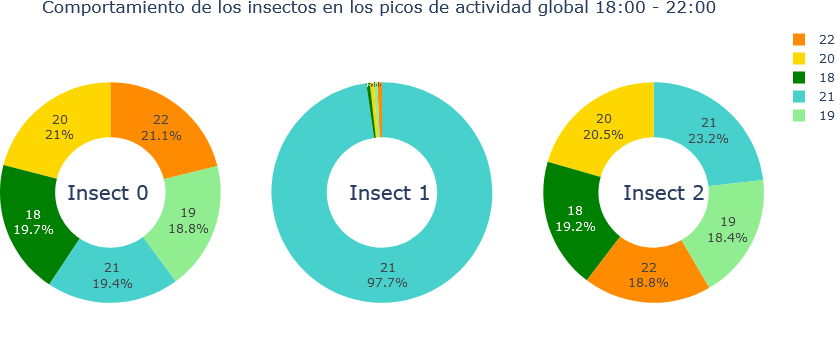

In [16]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=[639,610,683,632,687], hole=.5,
                     name="Insect type 0"),
              1, 1)

fig.add_trace(go.Pie(labels=labels, values=[13,14,14,2482,17], hole=.5, name="Insect type 1"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=[100,96,107,121,98], hole=.5, name="Insect type 2"),
              1, 3)

fig.update_layout(
    title_text="Comportamiento de los insectos en los picos de actividad global 18:00 - 22:00",
    annotations=[dict(text='Insect 0', x=0.09, y=0.5, font_size=20, showarrow=False),
                dict(text='Insect 1', x=0.51, y=0.5, font_size=20, showarrow=False),
                dict(text='Insect 2', x=0.92, y=0.5, font_size=20, showarrow=False)])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(margin = dict(t=25, l=0, r=0, b=0))
fig.update_traces(marker=dict(colors=colors))
fig.show()

**Observaciones:**
De izquierda a derecha tenemos representados los movimientos de los insectos tipo 0, 1 y 2. Vemos que los insectos de tipo 1 (Himenoptera) son más diurnas que las otras categorías. 

A continuación, vamos a realizar el cambio de horas a minutos y veremos su distribución. Esta nueva variable se llamará `Sensor_min`.

In [17]:
df_train['Sensor_min'] = (df_train['Hour']*60) + df_train['Minutes']
df_train = df_train.drop(['Hour','Minutes'], axis=1)
df_train = df_train[['Sensor_min','Sensor_alpha', 'Sensor_beta', 'Sensor_gamma', 'Sensor_alpha_plus',
       'Sensor_beta_plus', 'Sensor_gamma_plus', 'Insect']]
df_train.head()

Sensor_min  Sensor_alpha  Sensor_beta  Sensor_gamma  Sensor_alpha_plus  \
0        1346    119.910995   242.838324   -316.819222         250.195048   
1         616    -90.790536  -269.470767   -182.581844          95.394941   
2        1302    -20.028003  -147.070212     50.280872         -90.750386   
3        1277    -21.258567     0.467070    -86.164153         -21.813529   
4        1096    -58.154501   -13.051195   -156.501167          48.392938   

   Sensor_beta_plus  Sensor_gamma_plus  Insect  
0        -53.547777        -112.049983       2  
1         37.291944          48.525180       0  
2        -50.476556          85.399009       1  
3       -209.256006          16.291882       0  
4       -110.008860         -10.285138       2

In [18]:
df_test['Sensor_min'] = (df_test['Hour']*60) + df_test['Minutes']
df_test = df_test.drop(['Hour','Minutes'], axis=1)
df_test = df_test[['Sensor_min','Sensor_alpha', 'Sensor_beta', 'Sensor_gamma', 'Sensor_alpha_plus',
       'Sensor_beta_plus', 'Sensor_gamma_plus']]

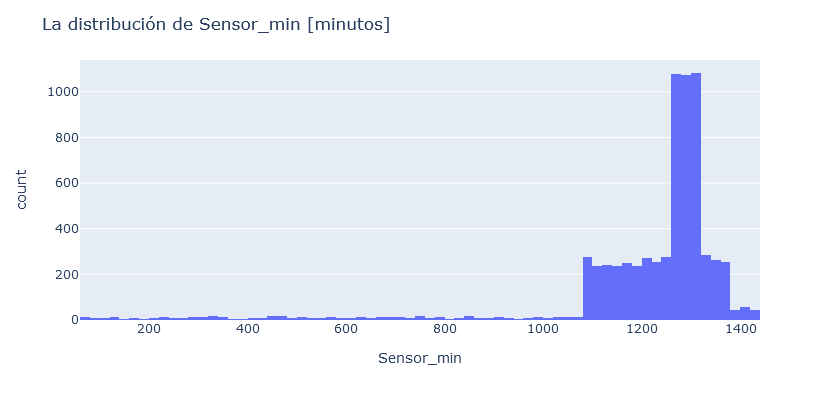

In [19]:
fig = px.histogram(df_train, x="Sensor_min", height=400)
fig.update_layout(title_text='La distribución de Sensor_min [minutos]')
fig.show()

**Observaciones:**
Vemos que hay una distribución no uniforme de los datos con una mayor concentración entre [1250 - 1320] minutos (20-22 horas). Esto significaría que los insectos tienen hábitos en el horario tarde - noche.

<a id ="2.4.6"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>2.4.6 Tratamiento de datos outliers</center></h2>

Los datos outliers son esos registros que están fuera del rago previamente establecido llamados límite superior y límite inferior. Hemos decidido que los límites inferior y superior estarán definidos como:
- Límite superior: quantile(0.75) + 1.5*(quantile(0.75)-quatile(0.25))
- Límite inferior: quantile(0.25) - 1.5*(quantile(0.75)-quatile(0.25))

Mostraremos primeramente, un diagrama boxplot interactivo para visualizar el conjunto de características del `df_train`. En este gráfico puedes interactuar con él y poder ver los diferentes valores de los cuatiles y sus outliers.

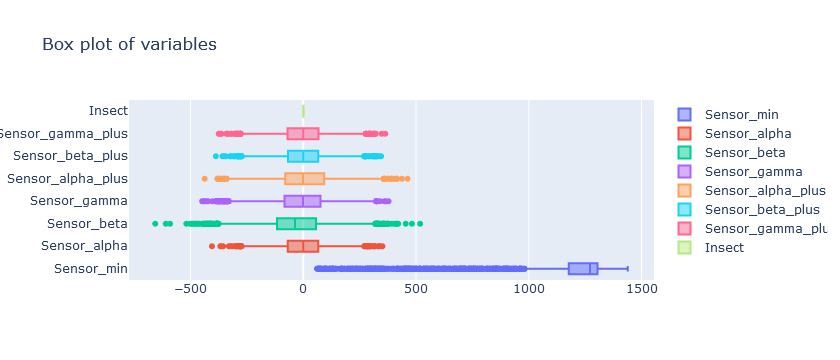

In [20]:
fig = go.Figure()
# Use x instead of y argument for horizontal plot

x0 = df_train['Sensor_min']
x1 = df_train['Sensor_alpha']
x2 = df_train['Sensor_beta']
x3 = df_train['Sensor_gamma']
x4 = df_train['Sensor_alpha_plus']
x5 = df_train['Sensor_beta_plus']
x6 = df_train['Sensor_gamma_plus']
x7 = df_train['Insect']

fig.update_layout(title_text='Box plot of variables')

fig.add_trace(go.Box(x=x0, name= "Sensor_min"))
fig.add_trace(go.Box(x=x1, name = "Sensor_alpha"))
fig.add_trace(go.Box(x=x2, name = "Sensor_beta"))
fig.add_trace(go.Box(x=x3, name = "Sensor_gamma"))
fig.add_trace(go.Box(x=x4, name = "Sensor_alpha_plus"))
fig.add_trace(go.Box(x=x5, name = "Sensor_beta_plus"))
fig.add_trace(go.Box(x=x6, name = "Sensor_gamma_plus"))
fig.add_trace(go.Box(x=x7, name = "Insect"))

fig.show()

In [21]:
data = df_train
outlier_list=[]
for c in data.columns[:-1]:
    Q1=data[c].quantile(q=0.25)
    Q3=data[c].quantile(q=0.75)
    print ("***************************************************************************")
    print('👍 OUTLIER DETECTION FOR',c.upper())
    print ("***************************************************************************")
    
    print('1st Quartile (Q1) is: ', Q1)
    print('3st Quartile (Q3) is: ', Q3)
    print('Interquartile range (IQR) is ', iqr(data[c]))
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('Lower outliers in',c, L_outliers)
    print('Upper outliers in ',c, U_outliers)
    print ("***************************************************************************")
    print('Number of outliers in',c, 'upper : ', data[data[c]>U_outliers][c].count())
    print('Number of outliers in',c,' lower : ', data[data[c]<L_outliers][c].count())
    print('% of Outlier in ',c,' upper: ',round(data[data[c]>U_outliers][c].count()*100/len(data)), '%')
    print('% of Outlier in ',c,' lower: ',round(data[data[c]<L_outliers][c].count()*100/len(data)), '%')
    print ("***************************************************************************")
    print(data[  (data[c] < L_outliers) | (data[c] > U_outliers)  ].index)
    outlier_list.extend(data[  (data[c] < L_outliers) | (data[c] > U_outliers)  ].index)
    print('\n')
    
outlier = pd.DataFrame()
names = ['Sensor_min', 'Sensor_alpha', 'Sensor_beta', 'Sensor_gamma',
       'Sensor_alpha_plus', 'Sensor_beta_plus', 'Sensor_gamma_plus']
values = [7,0,1,1,0,0,0]
outlier['Names'] = names
outlier['Percentage %'] = values
outlier = outlier.set_index('Names')
outlier.head()

***************************************************************************
👍 OUTLIER DETECTION FOR SENSOR_MIN
***************************************************************************
1st Quartile (Q1) is:  1177.0
3st Quartile (Q3) is:  1305.0
Interquartile range (IQR) is  128.0
Lower outliers in Sensor_min 985.0
Upper outliers in  Sensor_min 1497.0
***************************************************************************
Number of outliers in Sensor_min upper :  0
Number of outliers in Sensor_min  lower :  485
% of Outlier in  Sensor_min  upper:  0 %
% of Outlier in  Sensor_min  lower:  7 %
***************************************************************************
Int64Index([   1,    7,   12,   22,   26,   40,   42,   44,   50,   63,
            ...
            6856, 6864, 6871, 6876, 6880, 6890, 6954, 6961, 6978, 6983],
           dtype='int64', length=485)


***************************************************************************
👍 OUTLIER DETECTION FOR SENSOR_ALPHA
******

Percentage %
Names                          
Sensor_min                    7
Sensor_alpha                  0
Sensor_beta                   1
Sensor_gamma                  1
Sensor_alpha_plus             0

Se puede ver que los outliers representan un tanto por ciento muy pequeño con respecto a la totalidad. Esto implica que al tratar los outliers, no perderíamos información significativa. 

*Nota: La variable `Sensor_min` perderá el 7% de sus datos. Debido a que hemos comentado que el Tipo 1 no es un animal nocturno, puede que perdamos información de esta categoría.*

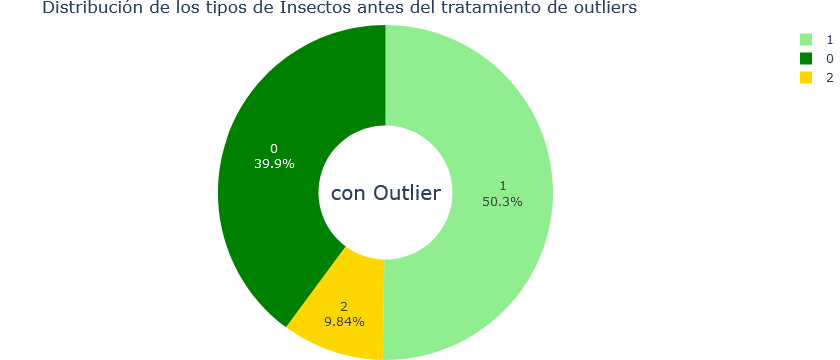

In [22]:
df_train[df_train['Insect']==1].shape # 2793
df_train[df_train['Insect']==0].shape # 3519
df_train[df_train['Insect']==0].shape # 689

labels = ['0','1', '2']
values = [2793,3519,689]
colors = ['green','lightgreen','gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Distribución de los tipos de Insectos antes del tratamiento de outliers"
   )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(margin = dict(t=25, l=0, r=0, b=0))
fig.update_traces(marker=dict(colors=colors))
fig.update_layout(
    title_text="Distribución de los tipos de Insectos antes del tratamiento de outliers",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='con Outlier', x=0.50, y=0.5, font_size=20, showarrow=False)])

fig.show()

In [23]:
df_train = df_train.drop(outlier_list,axis=0).reset_index(drop = True)

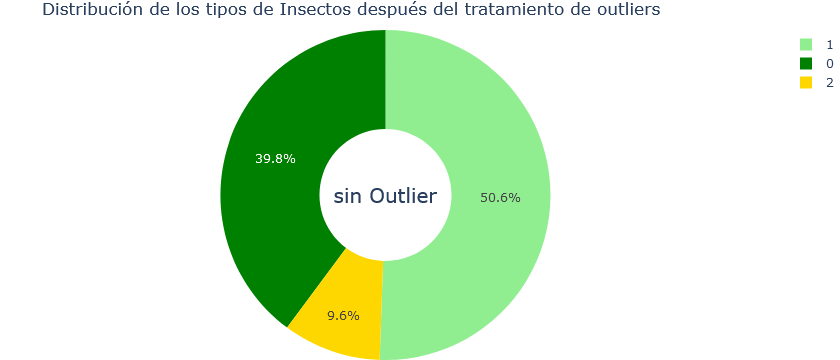

In [24]:
df_train[df_train['Insect']==1].shape # 2490
df_train[df_train['Insect']==0].shape # 3161
df_train[df_train['Insect']==2].shape # 600

labels = ['0','1', '2']
values = [2490,3161,600]
colors = ['green','lightgreen','gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(margin = dict(t=30, l=0, r=0, b=0))
fig.update_traces(marker=dict(colors=colors))

fig.update_layout(
    title_text="Distribución de los tipos de Insectos después del tratamiento de outliers",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='sin Outlier', x=0.50, y=0.5, font_size=20, showarrow=False)])
fig.show()

**Observaciones:**

- La proporción entre las categorías de la variable `Insect` se conserva pero se ha perdido de cada categoría:
    - Tipo 0: 10.8%
    - Tipo 1: 10.2%
    - Tipo 2: 12.9%
    
Esto podría ser un problema o no cara a la predicción de los datos con al algoritmo.

<a id ="2.5"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>2.5 EDA</center></h2> 

En este punto del juego ya tenemos una imagen de la investigación. Hemos explicado en el apartado anterior y muy extensamente las características de cada variable. 

<a id ="2.5.1"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>2.5.1 Correlación entre variables</center></h2>

Ahora vamos a estudiar la relación que pudiese existir entre 2 variables.Para ello usaremos la matriz de correlación. Hemos de tener en cuenta que las variables son sensores y el minuto en el que se ha registrado las observaciones. Por tanto, las variables son independientes entre sí por lo que será dificil, a priopi, ver una correlación de pearson entre ellas.

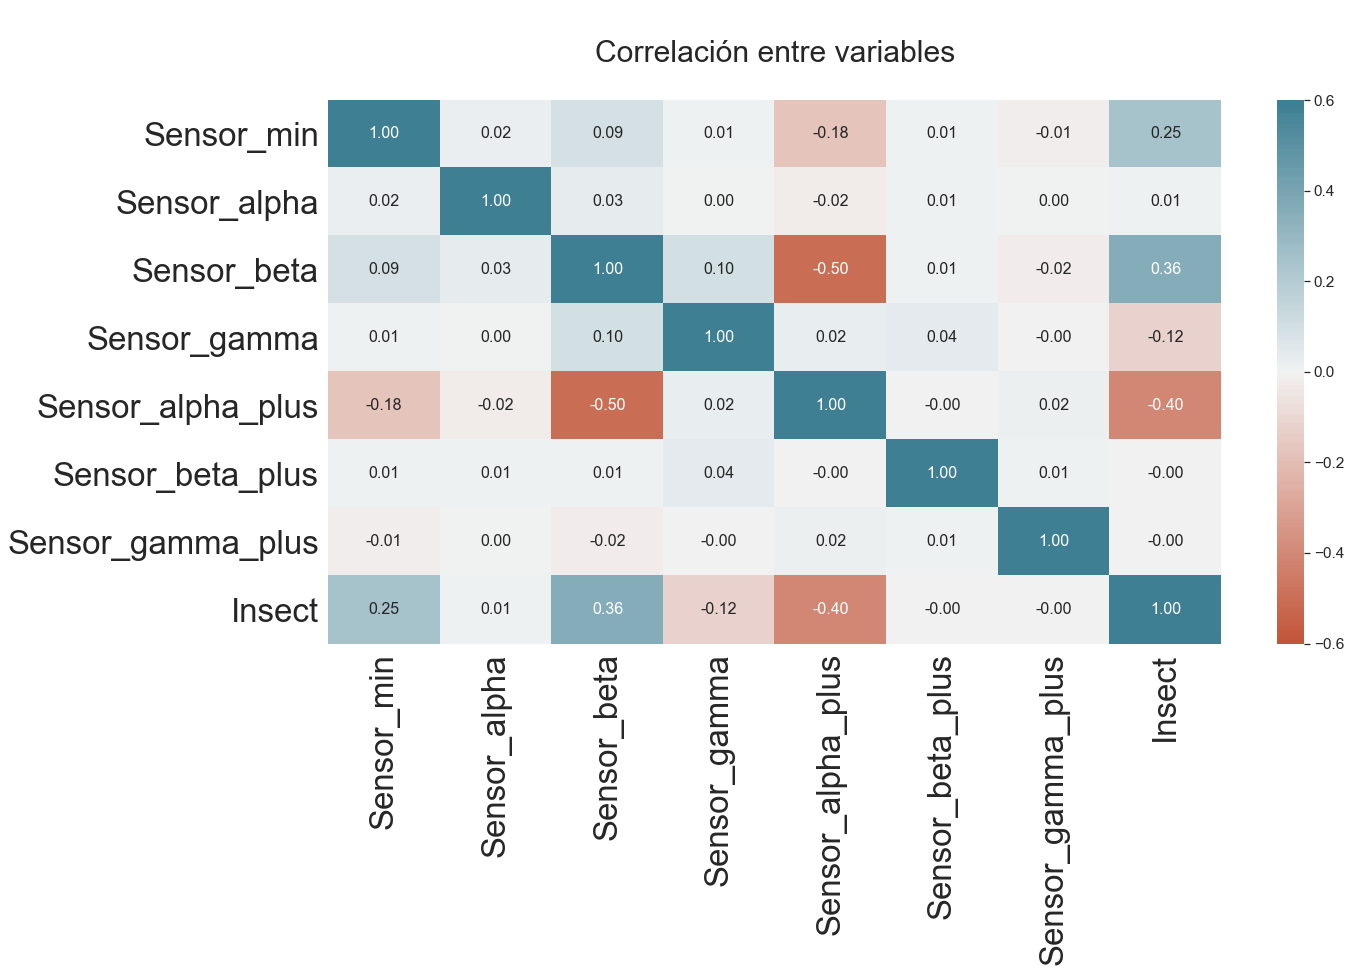

In [25]:
plt.rcParams["figure.figsize"] = (10,3)
corr = df_train.corr()

plt.figure(figsize=(20,10))
plt.title("\nCorrelación entre variables\n", size=30)
sns.set(font_scale=1.4)

sns.heatmap(corr,
            annot=True,
            cbar=True,
            annot_kws={"size": 16},
            vmin      = -0.6,
            vmax      = 0.6,
            center    = 0,
            cmap=sns.diverging_palette(20, 220, n=200),
            fmt='.2f')


plt.show()

**Conclusiones:**

En general no hay correlaciones fuertes. En valor absoluto, el valor de correlación más grande es 0.51 entre las variables `Sensor alpha plus` y `Sensor beta`. 
- ¿La variable target (Insect) tiene alguna correlación significativa? Todas las correlaciones son bajas pero dentro de las bajas podríamos "destacar":
    - Corr(Insect, Sensor_beta) = 0.37
    - Corr(Insect, Sensor_alpha_plus) = -0.40.
    
No obstante, desde el punto de vista estadístico, podríamos considerar que las dos correlaciones mencionadas pueden ser puro "azar" debido a que son correlaciones no significativas. 

<a id ="2.5.2"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>2.5.2 Análisis del target</center></h2>

La variable `Insect` es la variable target de nuestro estudio. Es una variable categórica convertida en integer por los patrocinadores. Esta variable determina el tipo de problema al cual nos enfrentaremos en el modelado del algoritmo: `problema muticlasificador`.
A continuación, expondremos un gráfico con las variables que más se correlacionan con la variable `Insect`.

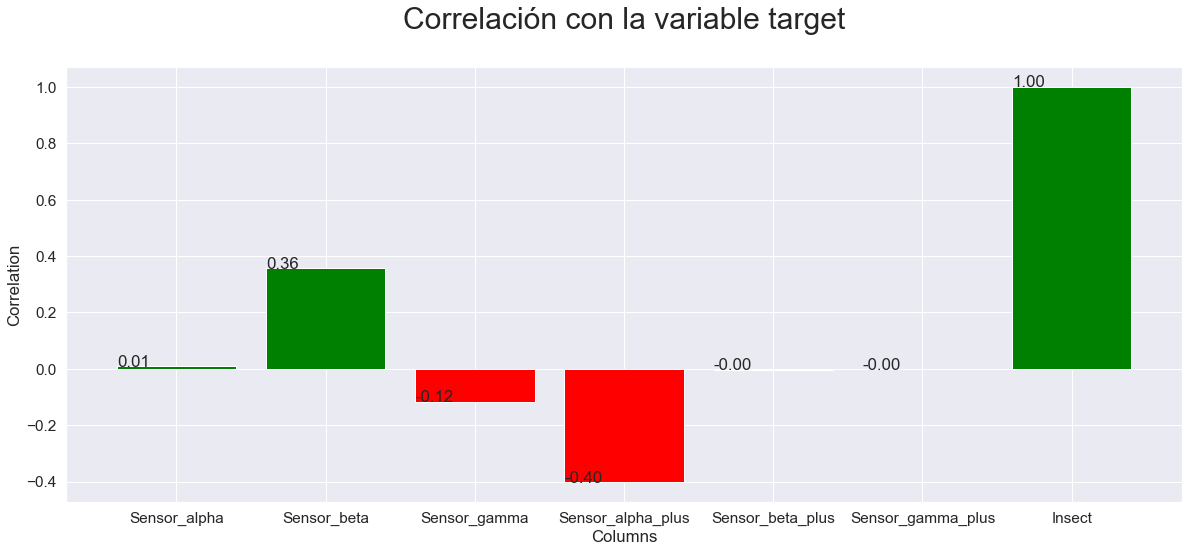

In [26]:
data = df_train.corr().loc[:,['Insect']]

# Fetch Index and Values From Data
index = data.index[1:]
values = data.values.flatten()[1:]

# Set figure size, title and labels
fig,ax = plt.subplots(figsize=(20,8))
ax.set_title("Correlación con la variable target\n", size=30)
ax.set_xlabel("Columns")
ax.set_ylabel("Correlation")

# Plot a Barplot
plot = plt.bar(index,values,color=['red' if x<0 else 'green' for x in values])

# Annotate Plots
for p in ax.patches:
    ax.annotate("{:.2f}".format(p.get_height()),(p.get_x(),p.get_height()))

# Show plot
plt.show()

Como habíamos dicho, ninguna variables presenta una alta correlación con la target. 

A continuación nos gustaría dar una vuelta de visión del problema. Queremos contestar a la siguientes pregunta: ¿Cómo se comportan los diferentes insectos para las distintas variables? Es decir, anteriormente ya se ha comentado que los insectos tipo 0 y 2 son más nocturnos que los insectos tipo 1. Ahora, sabiendo que los sensores marcan la posición de los insectos y que son variables independientes entre sí, queremos saber si hay la posibilidad de saber **qué categoría de insectos vuelan a posiciones más altas**. Vamos a descubrirlo con el siguiente gráfico:

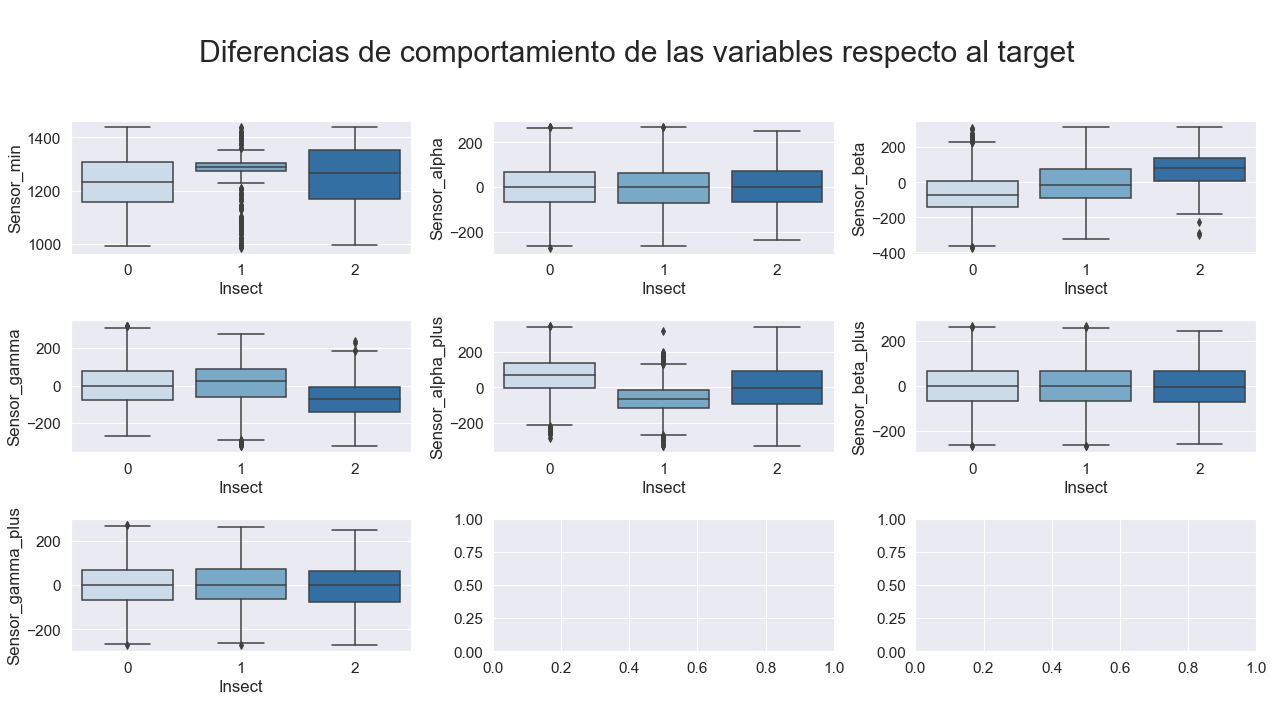

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
X0 = df_train[['Sensor_min', 'Sensor_alpha', 'Sensor_beta', 'Sensor_gamma',
       'Sensor_alpha_plus', 'Sensor_beta_plus', 'Sensor_gamma_plus', 'Insect']]
fig.suptitle('\nDiferencias de comportamiento de las variables respecto al target\n', size=30)

sns.boxplot(ax=axes[0, 0], data=X0, x='Insect', y='Sensor_min', palette = "Blues")
sns.boxplot(ax=axes[0, 1], data=X0, x='Insect', y='Sensor_alpha', palette="Blues")
sns.boxplot(ax=axes[0, 2], data=X0, x='Insect', y='Sensor_beta', palette="Blues")
sns.boxplot(ax=axes[1, 0], data=X0, x='Insect', y='Sensor_gamma', palette="Blues")
sns.boxplot(ax=axes[1, 1], data=X0, x='Insect', y='Sensor_alpha_plus', palette="Blues")
sns.boxplot(ax=axes[1, 2], data=X0, x='Insect', y='Sensor_beta_plus', palette="Blues")
sns.boxplot(ax=axes[2, 0], data=X0, x='Insect', y='Sensor_gamma_plus', palette="Blues")

fig.tight_layout()

**Observaciones:**

- `Sensor_min`: Como mencionamos anteriormente, los insectos tipo 1 se diferencian de las otras categorías de forma muy visual. Hay movimiento en una franja muy estrecha de la noche pero podemos decir que durante todo el día presentan movimiento. 
- Las otras variables (Sensores) son más difíciles de extraer conclusiones pero hay tre sensores en particular que podemos observar:
    - Los sensores `Sensor_beta`y `Sensor_gamma` muestran comportamientos antagónicos. Es decir, los insectos tipo 2 se mueven en una posición más alta en el `Sensor_beta` y a la vez más bajos en el `Sensor_gamma`. Este comportamiento es opuesto en el grupo de insectos tipo 0. 
    - Los insector tipo 1 presentan movimientos a posiciones más bajas en el `Sensor_alpha_plus`. 
    
Estas indicaciones podrían ser una base introductoria a la diferenciación de insectos gracias a la posición de sus movimientos captados por los distintos sensores. Si tuvieramos más datos, podríamos averiguar si esto es base inicial para más investigaciones futuras.

<a id ="3"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>3. Algoritmo</center></h1>

A nivel de Machine Learning, este problema es del tipo multiclasificación con inputs numéricas y un output formado por 3 categorías de tipo nominal.
A partir de este punto, podemos escoger muchos algoritmos diferentes y aplicar optimización con Optuna y también técnicas de ensamblado. No obstante, quería ir un paso más allá y aprovechando las técnicas de Deep Learning me he decidido usar las Gated Residual (GRN) y Variable Selection Networks (VSN) usando keras.io.  

¿Por qué usar GRN en este problema? Es debido a la idea principal de filtrar suavemente las características menos importantes para usar esta capacidad de aprendizaje en las características que tienen más peso. 

Los pasos para su realización son:
- 1. Crear una "incrustación de las características" (embedding features) como input al modelo.
- 2. Aplicar el GRN a cada característica teniendo en mente la idea principal de selección del modelo.
- 3. Aplicar el GRN a las características concatenadas.
- 4. Crear la suma ponderada del punto 2 y 3 como outpur de VSN
- 5. Hacer una predicción final con softmax. 

<a id ="3.1"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>3.1 Selección de características</center></h2>

Antes de pasar a realizar el algoritmo mencionado,vamor a ver qué características son las que presentan más o menos peso. Para seleccionar las características seguiremos las pautas propias del problema: 
- inputs numéricas
- output categórica nomial multiclase

Los dos criterios de selección de características son:

- **A: ANOVA F-stadistic:**

Feature 0: 259.377486
Feature 1: 0.630081
Feature 2: 306.306787
Feature 3: 88.314442
Feature 4: 861.498005
Feature 5: 0.054576
Feature 6: 0.235892


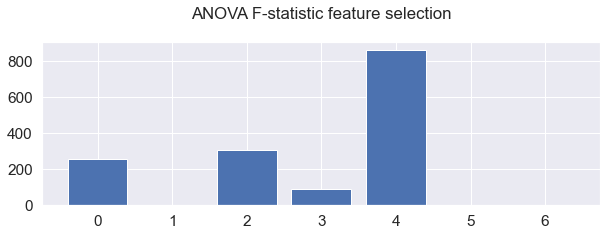

In [28]:
from matplotlib import pyplot
# load the dataset
def load_dataset(data):
    # retrieve array
    dataset = data.values
    # split into input and output variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    return X, y

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = load_dataset(df_train)

#x_train_mask = x_train_mask_pd.values

x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.33, random_state=2022)

# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train_split, y_train_split, x_test_split)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    # plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.title('ANOVA F-statistic feature selection\n', fontdict=None, loc='center')
pyplot.show()

**Observaciones:**
Las tres variables que tienen más peso son: 
- 4: `Sensor_alpha_plus`
- 2: `Sensor_beta`
- 0: `Sensor_min`

Las otras características tienen menor peso por lo que en un algoritmo de Machine Learning sugeriría eliminar dichas características, pero con el algoritmo de Deep Learning escogido puedo quedármelas y darles una segunda vida. 

- **B: Mutual info classification:**

Feature 0: 0.374764
Feature 1: 0.011348
Feature 2: 0.068469
Feature 3: 0.041304
Feature 4: 0.187556
Feature 5: 0.010204
Feature 6: 0.003954


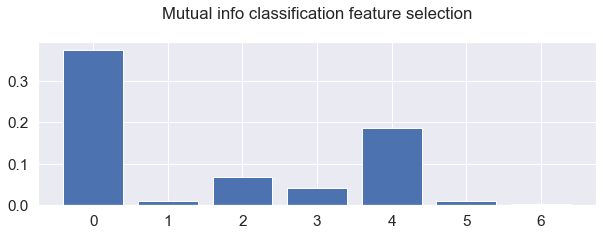

In [29]:
from matplotlib import pyplot
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(x_train_split, y_train_split, x_test_split)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    # plot the scores
pyplot.title('Mutual info classification feature selection\n', fontdict=None, loc='center')
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

**Observaciones:**
En este caso, podemos ver diferencias significativas donde el criterio de selección de características seleccionado indica que las variables con más relevancia son:
- 0: `Sensor_min`
- 4: `Sensor_alpha_plus`

Si lo comparamos con la anterior selección de características, podemos ver que aparecen estas dos variables en diferente grado de importancia siendo más relevante la variable `Sensor_alpha_plus` que `Sensor_min`. No obstante las siguientes variables tienen mucha menos relevancia por lo que implicaría ver cómo se podría jugar con ellas.

Una vez tenemos todo esto en mente vamos a por el **algoritmo para la resolución del problema**

<a id ="3.2"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>3.2 Gated Residual (GRN)</center></h2>

<a id ="3.2.1"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>3.2.1 Creación del modelo</center></h2>

Vamos a empezar dividiendo los datos. Recordamos que tenemos un dataset ofrecido por el patrocinador sin la variable `Insect` para ver el desempeño de nuestro modelo al introducirle nuevos datos.

In [30]:
# split dataframes for later modeling
X = df_train.drop(['Insect'], axis=1).copy()
y = df_train['Insect'].copy()

X_test = df_test.copy()

A continuación, vamos a transformar la variable `Insect` a variable categórica.

In [31]:
# create label-encoded one-hot-vector for softmax, mutliclass classification
le = LabelEncoder()
target = keras.utils.to_categorical(le.fit_transform(y))

Vamos a hacer check para si las dimensiones de los diferentes elementos son correctos:

In [32]:
gc.collect()
print(X.shape, y.shape, target.shape, X_test.shape)

(6251, 7) (6251,) (6251, 3) (3000, 7)


Definiremos las funciones de ayuda para nuestro modelo: set_seed, plot_eval_results y plot_cm:
- `set_seed`: Sirve para escoger un seed aleatorio.
- `plot_eval_results`: Se muestra la diferencia del comportamiento entre train_loss y valid_loss para cada cv.
- `plot_cm`: Muestra tres gráficos que muestra las diferentes métricas.

In [33]:
# define helper functions
def set_seed(seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    print(f"Seed set to: {seed}")

def plot_eval_results(scores, n_splits):
    cols = 10
    rows = int(np.ceil(n_splits/cols))
    
    fig, ax = plt.subplots(rows, cols, tight_layout=True, figsize=(20,2.5))
    ax = ax.flatten()

    for fold in range(len(scores)):
        df_eval = pd.DataFrame({'train_loss': scores[fold]['loss'], 'valid_loss': scores[fold]['val_loss']})

        sns.lineplot(
            x=df_eval.index,
            y=df_eval['train_loss'],
            label='train_loss',
            ax=ax[fold]
        )

        sns.lineplot(
            x=df_eval.index,
            y=df_eval['valid_loss'],
            label='valid_loss',
            ax=ax[fold]
        )

        ax[fold].set_ylabel('')

    sns.despine()

def plot_cm(cm):
    metrics = {
        'accuracy': cm / cm.sum(),
        'recall' : cm / cm.sum(axis=1),
        'precision': cm / cm.sum(axis=0)
    }
    
    fig, ax = plt.subplots(1,3, tight_layout=True, figsize=(15,5))
    ax = ax.flatten()

    mask = (np.eye(cm.shape[0]) == 0) * 1

    for idx, (name, matrix) in enumerate(metrics.items()):

        ax[idx].set_title(name)

        sns.heatmap(
            data=matrix,
            cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True),
            cbar=False,
            mask=mask,
            lw=0.25,
            annot=True,
            fmt='.2f',
            ax=ax[idx]
        )
    sns.despine()

Seguidaramente definitemos dos callbacks: `ReduceLROnPlateau` y `EarlyStopping`:

In [34]:
# define callbacks
lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", 
    factor=0.5, 
    patience=5, 
    verbose=True
)

es = keras.callbacks.EarlyStopping(
    monitor="val_get_f1", 
    patience=10, 
    verbose=True, 
    mode="max", 
    restore_best_weights=True
)

Ahora vamos a definir el modelo `GRN` y `VariableSelection`:

In [35]:
class GatedLinearUnit(layers.Layer):
    def __init__(self, units):
        super(GatedLinearUnit, self).__init__()
        self.linear = layers.Dense(units)
        self.sigmoid = layers.Dense(units, activation="sigmoid")

    def call(self, inputs):
        return self.linear(inputs) * self.sigmoid(inputs)

class GatedResidualNetwork(layers.Layer):
    def __init__(self, units, dropout_rate):
        super(GatedResidualNetwork, self).__init__()
        self.units = units
        self.elu_dense = layers.Dense(units, activation="elu")
        self.linear_dense = layers.Dense(units)
        self.dropout = layers.Dropout(dropout_rate)
        self.gated_linear_unit = GatedLinearUnit(units)
        self.layer_norm = layers.LayerNormalization()
        self.project = layers.Dense(units)

    def call(self, inputs):
        x = self.elu_dense(inputs)
        x = self.linear_dense(x)
        x = self.dropout(x)
        if inputs.shape[-1] != self.units:
            inputs = self.project(inputs)
        x = inputs + self.gated_linear_unit(x)
        x = self.layer_norm(x)
        return x

class VariableSelection(layers.Layer):
    def __init__(self, num_features, units, dropout_rate):
        super(VariableSelection, self).__init__()
        self.grns = list()
        for idx in range(num_features):
            grn = GatedResidualNetwork(units, dropout_rate)
            self.grns.append(grn)
        self.grn_concat = GatedResidualNetwork(units, dropout_rate)
        self.softmax = layers.Dense(units=num_features, activation="softmax")

    def call(self, inputs):
        v = layers.concatenate(inputs)
        v = self.grn_concat(v)
        v = tf.expand_dims(self.softmax(v), axis=-1)

        x = []
        for idx, input in enumerate(inputs):
            x.append(self.grns[idx](input))
        x = tf.stack(x, axis=1)

        outputs = tf.squeeze(tf.matmul(v, x, transpose_a=True), axis=1)
        return outputs

En este punto, introduciremos los inputs y el modelo genérico:

In [36]:
def create_model_inputs():
    inputs = {}
    for feature_name in X.columns:
        inputs[feature_name] = layers.Input(
            name=feature_name, shape=(), dtype=tf.float32
        )
    return inputs

def encode_inputs(inputs, encoding_size):
    encoded_features = []
    for col in range(inputs.shape[1]):
        encoded_feature = tf.expand_dims(inputs[:, col], -1)
        encoded_feature = layers.Dense(units=encoding_size)(encoded_feature)
        encoded_features.append(encoded_feature)
    return encoded_features

def create_model(encoding_size, dropout_rate=0.15):
    inputs = layers.Input(len(X.columns))
    feature_list = encode_inputs(inputs, encoding_size)
    num_features = len(feature_list)

    features = VariableSelection(num_features, encoding_size, dropout_rate)(
        feature_list
    )

    outputs = layers.Dense(units=target.shape[-1], activation="softmax")(features)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

Ahora, introduciremos las excepciones para el algortimo:

In [37]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    tf_strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print("Running on TPU:", tpu.master())
except:
    tf_strategy = tf.distribute.get_strategy()
    print(f"Running on {tf_strategy.num_replicas_in_sync} replicas")
    print("Number of GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Running on 1 replicas
Number of GPUs Available:  0


2022-05-18 16:24:50.181772: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-18 16:24:50.181806: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-18 16:24:50.181830: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (78d30e03-75d7-495f-8de8-4f3a82bf1bd4): /proc/driver/nvidia/version does not exist


El patrocinador del modelo ha sugerido que la métrica para el estudio del problema sea `f1-score`:

In [38]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

En este punto vamos a ver el cuerpo del modelo con todo lo anterior incorporándolo:

In [39]:
seed = 2022
set_seed(seed)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

predictions = []
oof_preds = {'y_valid': list(), 'y_hat': list()}
scores_nn = {fold:None for fold in range(cv.n_splits)}

for fold, (idx_train, idx_valid) in enumerate(cv.split(X,y)):
    X_train, y_train = X.iloc[idx_train], target[idx_train]
    X_valid, y_valid = X.iloc[idx_valid], target[idx_valid]
    
    scl = RobustScaler()
    X_train = scl.fit_transform(X_train)
    X_valid = scl.transform(X_valid)
    
    with tf_strategy.scope():
        model = create_model(encoding_size=128)

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            loss=keras.losses.CategoricalCrossentropy(),
            metrics=[get_f1]
        )
        
    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        epochs=90,
        batch_size=4096,
        shuffle=True,
        verbose=False,
        callbacks=[lr,es]
    )
    
    scores_nn[fold] = history.history
    
    oof_preds['y_valid'].extend(y.iloc[idx_valid])
    oof_preds['y_hat'].extend(model.predict(X_valid, batch_size=4096))
    
    prediction = model.predict(scl.transform(X_test), batch_size=4096) 
    predictions.append(prediction)
    
    #del model, prediction
    gc.collect()
    K.clear_session()
    
    print('_'*65)
    print(f"Fold {fold+1} || Min Val Loss: {np.min(scores_nn[fold]['val_loss'])}")
    print('_'*65)
    
print('_'*65)
overall_score = [np.min(scores_nn[fold]['val_loss']) for fold in range(cv.n_splits)]
print(f"Overall Mean Validation Loss: {np.mean(overall_score)}")

Seed set to: 2022


2022-05-18 16:24:50.209706: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



Epoch 47: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 56: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Restoring model weights from the end of the best epoch: 51.
Epoch 61: early stopping
_________________________________________________________________
Fold 1 || Min Val Loss: 0.340271532535553
_________________________________________________________________
Restoring model weights from the end of the best epoch: 41.
Epoch 51: early stopping
_________________________________________________________________
Fold 2 || Min Val Loss: 0.3103936016559601
_________________________________________________________________

Epoch 54: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 61: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 66: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Restoring model weights from the end of the best epoch: 57.
Epoch 67: early stopping
______

<a id ="3.2.2"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>3.2.2 Evaluación y Resultados</center></h2>

Ahora vamos a representar visualmente las soluciones y ver si nuestro modelo a rendido correctamente según la métrica f1-score:

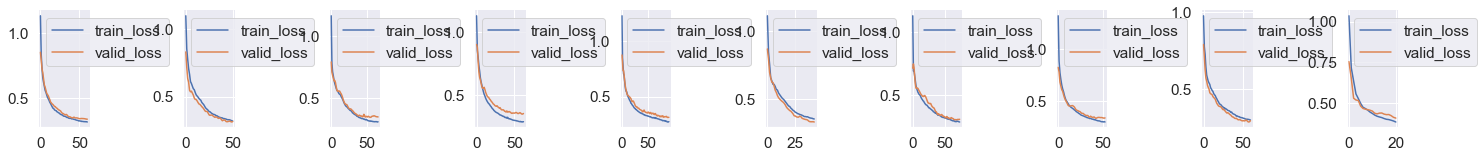

In [40]:
plot_eval_results(scores_nn, cv.n_splits)

Como se puede observar en la gráfica anterior, se puede ver el comportamiento de `train_loss` y `valid_loss`. Se observa que se comportan de forma parecida lo que es buena señal con respecto al rendimiento del problema para datos target conocidos. 

A continuación vamos a ver 3 gráficos basados en los rendimientos del modelo según 3 métricas. Es notorio decir que la métrica recall recalca que predice mejor las dos primeras categorías del `Insect` pero la tercera categoría no la trabaja adecuadamente. Es uno de los motivos por lo que en casos de problemas de multiclasificación con datos desbalanceados, es mejor usar la métrica f1-score. 

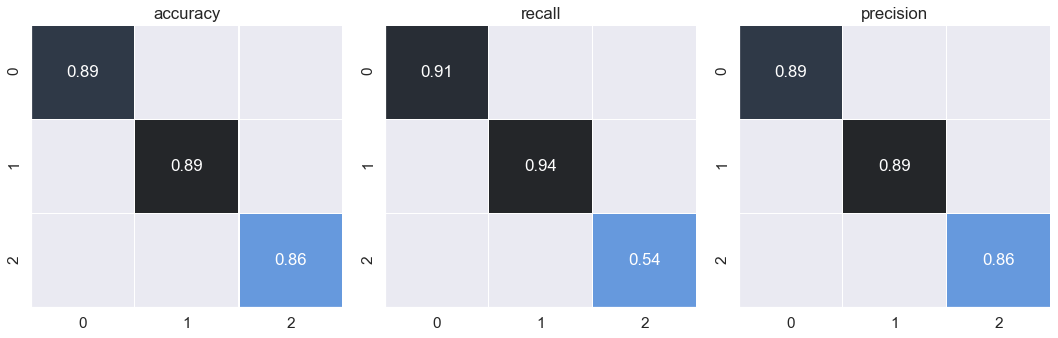

In [41]:
# prepare oof_predictions
oof_y_true = np.array(oof_preds['y_valid'])
oof_y_hat = le.inverse_transform(np.argmax(oof_preds['y_hat'], axis=1))

# create confusion matrix, calculate accuracy, recall & precision
cm = pd.DataFrame(data=confusion_matrix(oof_y_true, oof_y_hat, labels=le.classes_), index=le.classes_, columns=le.classes_)
plot_cm(cm)

Para saber más sobre los datos que no han sido clasificados correctamente, vamos a mostrar un gráfico con la diagonal igual a zero para una mejor visualización. 

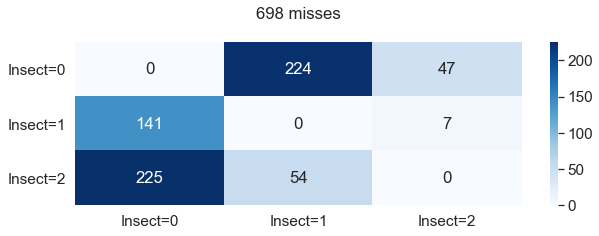

In [42]:
cm = confusion_matrix(oof_y_true, oof_y_hat)
ix = np.arange(cm.shape[0])
cm[ix, ix] = 0
col_names = [f'Insect={cls}' for cls in le.classes_]
cm = pd.DataFrame(cm, columns=col_names, index=col_names)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d').set(title=f'{cm.sum().sum()} misses\n ');

**Observaciones:**
Vemos que hay dos clasificaciones muy destacadas entre las categorías `Insect 2` e `Insect 0` y las categorías `Insect 0`e `Insect 1`. Esto implica que deberíamos afinar un poco más el modelo para intentar que clasificara estas categorías adecuadamente. No obstante si comparamos la cantidad de datos mal clasificados y los correctamente clasificados, podemos concluir que este algoritmo es bastante bueno para este tipo de problemas. A conitnuación observamos la matriz de confusión integral:

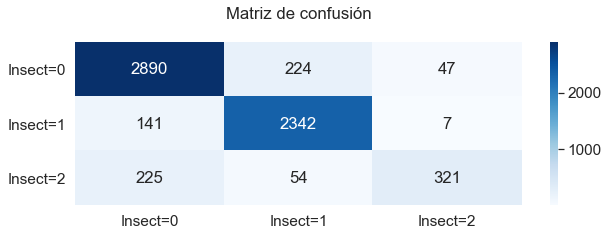

In [43]:
cm = confusion_matrix(oof_y_true, oof_y_hat)
ix = np.arange(cm.shape[0])
col_names = [f'Insect={cls}' for cls in le.classes_]
cm = pd.DataFrame(cm, columns=col_names, index=col_names)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d').set(title=f'Matriz de confusión\n');

Para finalizar esta sección vamos a ver el reporte de la clasificación donde veremos el rendimiento del algoritmo según diferentes métricas ya comentadas. Ahora nos hemos de focalizar en la métrica del patrocinador `f1-score`:

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(oof_y_true, oof_y_hat))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3161
           1       0.89      0.94      0.92      2490
           2       0.86      0.54      0.66       600

    accuracy                           0.89      6251
   macro avg       0.88      0.80      0.83      6251
weighted avg       0.89      0.89      0.88      6251



Es interesante observar que para `Insect 2` clasifica peor que sus compañeras pero si nos varamos en `macro avg`, la métrica estipula un 83% de rendimiento. Es decir, cada 100 muestras, 83 las clasifica correctamente. En futuros estudios podríamos ver si esta clasificación podría mejorar sin tener overfitting. 

<a id ="3.2.3"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>3.2.3 Predicción de Insects en el dataset test</center></h2>

En este apartado, vamos a ver si de verdad el modelo es tan bueno como vemos comentado. Usaremos el dataset `df_test` el cual carece de la variable target `Insect`. También incluiremos una gráfica de distribución de categorías para este nuevo conjunto de datos.

In [50]:
#create final prediction, inverse labels to original classes
final_predictions = le.inverse_transform(np.argmax(sum(predictions), axis=1))

#submission
submission = X_test.drop(['Sensor_min', 'Sensor_alpha', 'Sensor_beta', 'Sensor_gamma',
       'Sensor_alpha_plus', 'Sensor_beta_plus'], axis=1)
submission = submission.reset_index()
submission.columns = ['Id','Insect']
submission['Insect'] = final_predictions
submission.to_csv('results.csv', index=False)

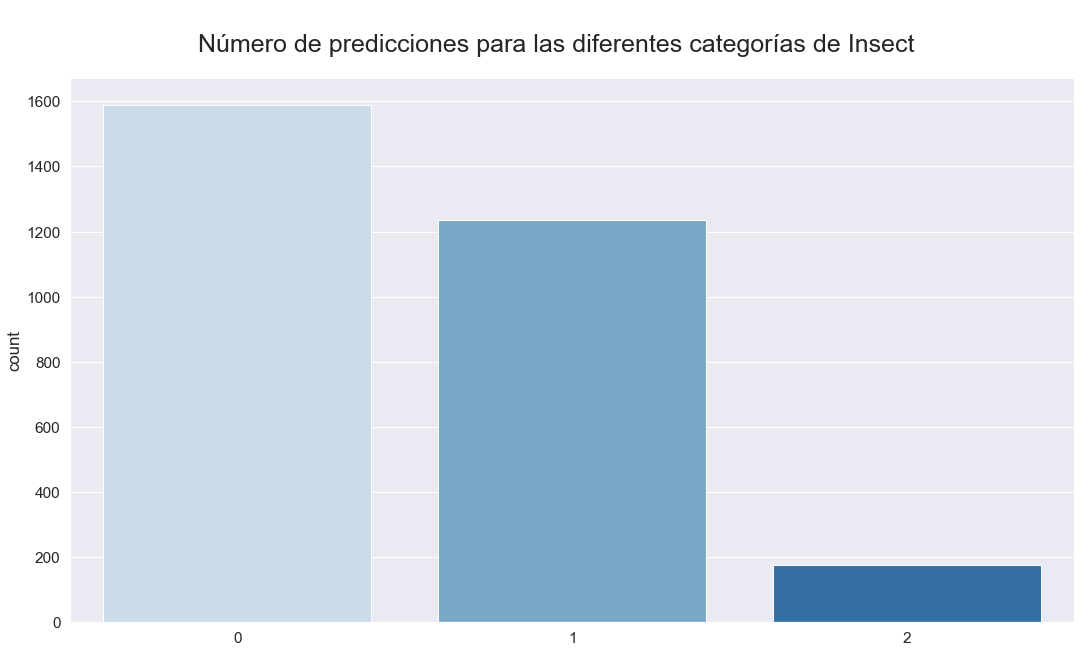

In [51]:
fig, axes = plt.subplots(1, 1, figsize=(18, 10))
fig.suptitle('\nNúmero de predicciones para las diferentes categorías de Insect\n\n', size=25)
sns.countplot(final_predictions,palette = "Blues")
sns.despine()

Como se puede observar en esta gráfica, un poco más del 50% de la nueva muestra, el algoritmo a predicho que son insectos de tipo 0 (Lepidoptero) y casi el 7% son insectos del tipo 2 (Diptera). Esto implica que el nuevo dataset es desbalanceado y hay menos presencia de Diptera que de Lepidoptero en el territorio que se han capturado los datos con una fiabilidad del 83% para los datos de entrenamiento.

<a id ="4"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>4. Conclusiones finales</center></h1>

El estudio tenía por objetivo determinar qué tipo de insecto teníamos en el territorio X según sus hábitos y movimientos. Hemos tratado los datos hasta llegar al punto que hemos descubierto que la Himenoptera tiene más presencia diurna que nocturna. Hemos podido observar que para tres sensores concretos el Lepidoptero y la Diptera se comportan de forma opuesta siendo más fácil su futura clasificación. 
Para el estudio de nuestros datos se ha Gated Residual y Variable Selection Networks debido a que les da importancia las características que tienen menor peso en el dataset. 
Seguidamente, hemos visto que según la métrica f1-score(macro), el modelo presenta un 83% de eficacia considerando a futuros trabajos poder mejorarla. Un posible detrimiento para esta eficacia es debido al desbalanceamiento de los datos. Sugerimos en futuros trabajos incorporar más datos de la Diptera. 
Finalmente, hemos introducido nuevos datos en nuestro algoritmo almacenados en un csv `results.csv` donde se puede ver las predicciones del `df_test`. Observamos que más del 50% predice que son Lepidopteros y menos del 7% Dipteras. 
Concluimos que es un buen modelo con futuras mejoras agregando más muestras a nuestro modelo. 

<a id ="5"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>5. Referencias finales</center></h1>

[1] https://parquesnaturales.gva.es/es/web/insectarium-virtual-del-parc-natural-del-penyal-d-ifac/orden-lepidoptera

[2] https://parquesnaturales.gva.es/es/web/insectarium-virtual-del-parc-natural-del-penyal-d-ifac/orden-hymenoptera

[3] https://parquesnaturales.gva.es/es/web/insectarium-virtual-del-parc-natural-del-penyal-d-ifac/orden-diptera